In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import richardsplot as rplot

# We preview K2 long term systematics as a function of channel and magnitude

In [2]:
#import systematics lc data frame
all_channels_df = pd.read_pickle("../template_lcs/k2_c08_CCD_systematics.pkl")

# Using the dataframe

Lets say our kepler AGN is a 19.8 magnitude and on channel 22

In [3]:
mag = 19.8
channel = 22
#find all templates on that ccd channel
channelMask = (all_channels_df.channel == channel)
#pick the template lc that is closest in magnitude to our target on that specific channel
magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()

In [4]:
#pull that row for from the dataframe, the template is stored in a row, rather than a column
row = all_channels_df.iloc[magnitudeMask]
#preview the row contents
row

0            -0.371327
1            -0.371327
2            -0.457090
3            -0.457090
4            -0.529100
5            -0.529100
6            -0.455215
7            -0.455215
8            -0.427499
9            -0.455215
10           -0.488750
11           -0.504617
12           -0.498232
13           -0.469206
14           -0.428414
15           -0.428414
16           -0.402573
17           -0.398900
18           -0.395903
19           -0.395903
20           -0.376933
21           -0.372854
22           -0.359459
23           -0.359459
24           -0.359459
25           -0.359459
26           -0.372854
27           -0.408669
28           -0.439221
29           -0.408669
               ...    
3827          0.468406
3828          0.468406
3829          0.468406
3830          0.502893
3831          0.497441
3832          0.468406
3833          0.497441
3834          0.503324
3835          0.474585
3836          0.476628
3837          0.493344
3838          0.516201
3839       

In [5]:
#pull the full template lc out of the row, ignore the last four columns
systematics_lc = row[:-4].values

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


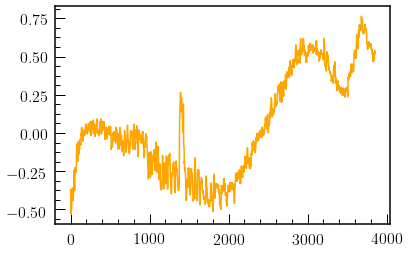

In [6]:
#preview the template lightcurve
plt.plot(systematics_lc, color = "orange")

## Preview the whole channel as a function of magnitude

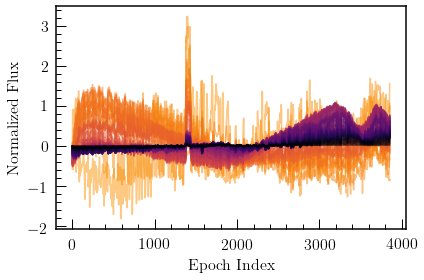

In [7]:
cmap = plt.get_cmap('inferno')
mag_colors = np.zeros((len(cmap.colors),4))
mag_colors[:,3] = 0.5 #this is the alpha parameter
mag_colors[:,:3] = cmap.colors



j = 0
for i in range(0,99, 1):
    row = all_channels_df[channelMask].iloc[i]
    systematics_lc = row[:-4].values
    plt.plot(systematics_lc, color =mag_colors[j*2] , zorder = 99-i)
    j +=1
#plt.plot(xrange(len(lc_med[:,-2])),lc_med[:,-2], label = "{:3.1f}".format(mag_med_bin_edges[-2]), alpha = 0.8) 
    
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")

plt.tight_layout()

---
### Calculating the power spectrum densities of the template light curves (around 19th magnitude)

We want to know if the systematics look like a DRM in their PSDs.

In [12]:
from analysis import *

In [34]:
mag = 19.0
channel = 22
#find all templates on that ccd channel
channelMask = (all_channels_df.channel == channel)
#pick the template lc that is closest in magnitude to our target on that specific channel
magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()


temp_flux = np.array(all_channels_df.iloc[magnitudeMask][:-4])
temp_time = np.arange(len(temp_flux))/48.0 # converting to days, starting at zero

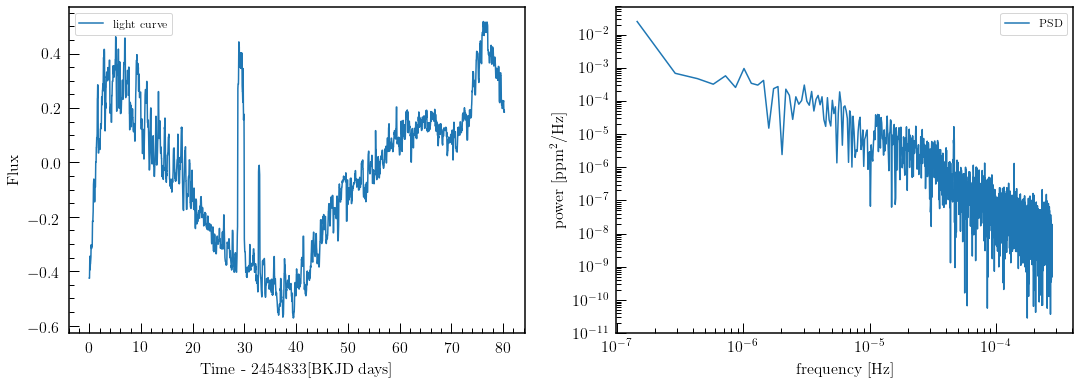

In [37]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
plot_lc_PSD(temp_time, temp_flux, ax[0], ax[1], f=k2_freq)

Well... That looks like a damped random walk. (Note: the x-label for the light curve is incorrect, the function was written to take time as days for plotting K2 light curves)

Let's try it for other channels!

In [11]:
# get all the active channels
df = pd.read_csv('object_keys/c8_shaya.csv')
active_ch = np.unique(np.array(df['CHANNEL']))
active_ch = active_ch[active_ch.argsort()] # sort 

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ValueError: attempt to get argmin of an empty sequence

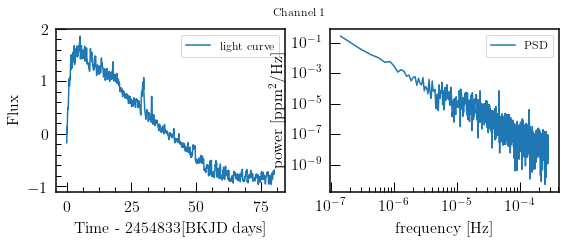

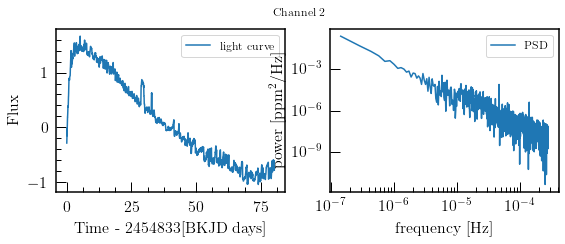

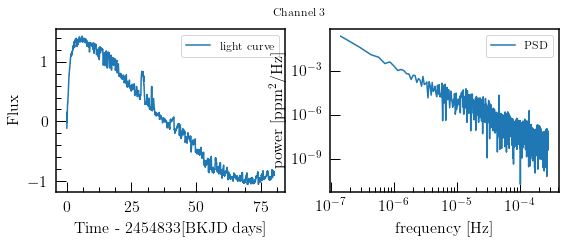

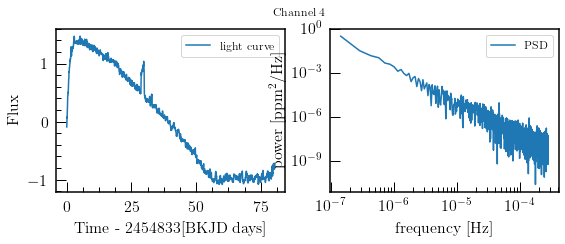

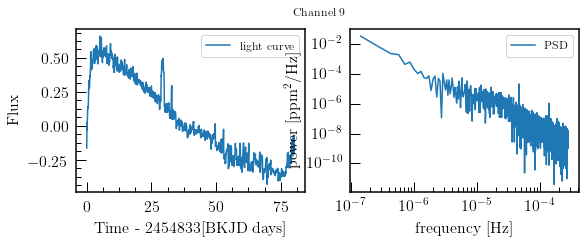

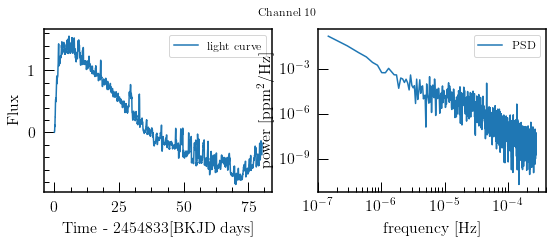

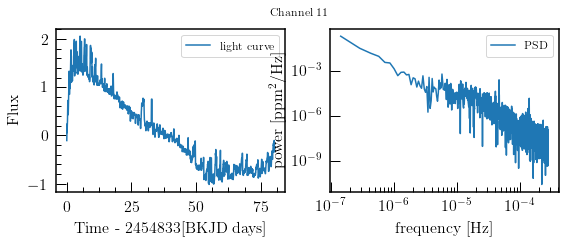

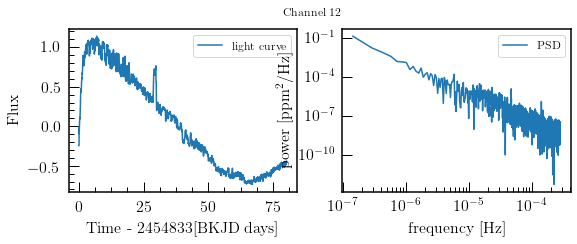

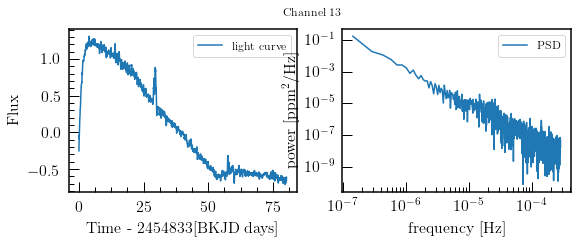

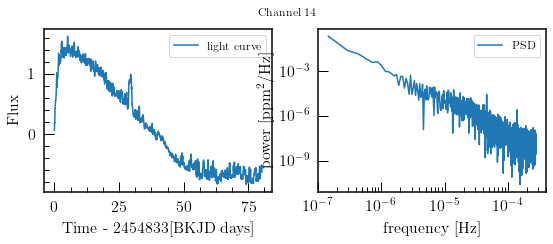

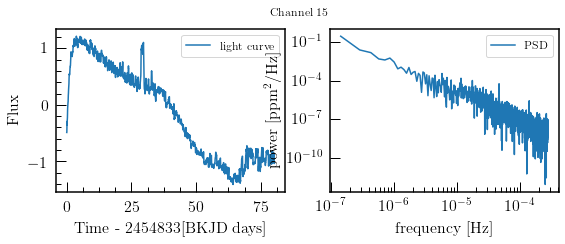

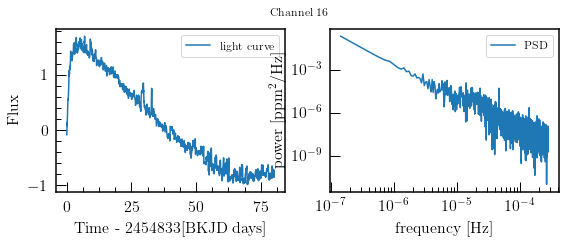

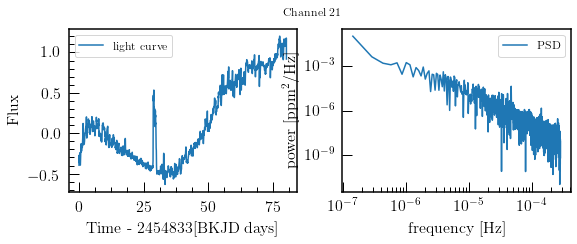

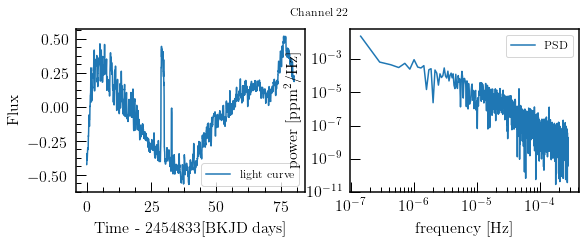

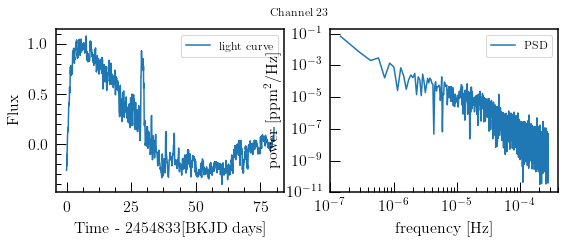

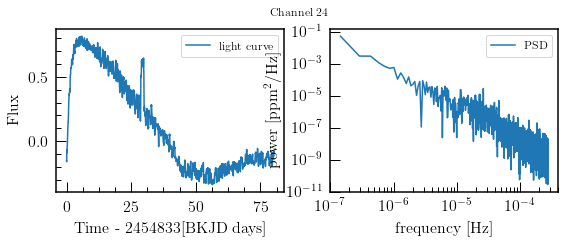

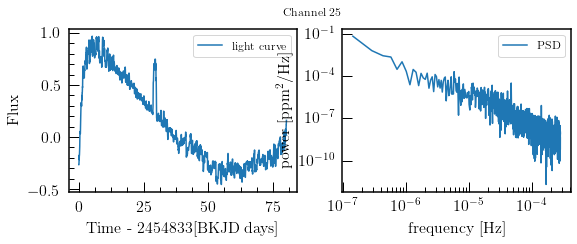

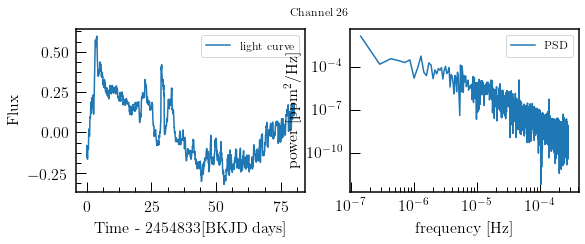

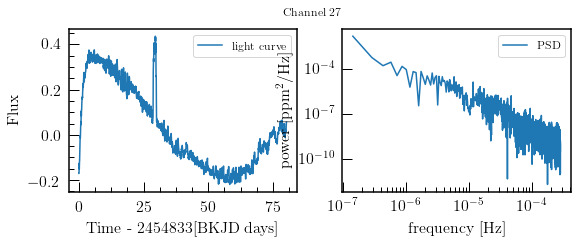

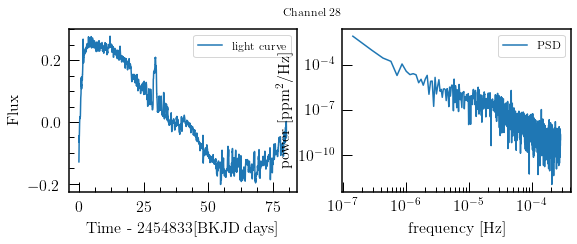

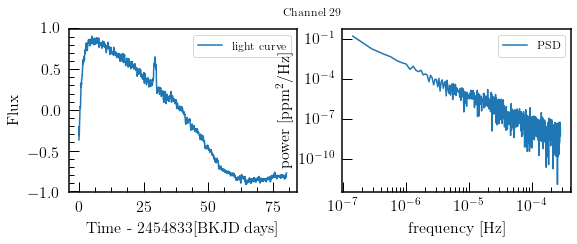

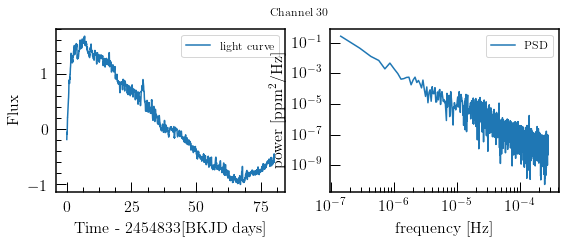

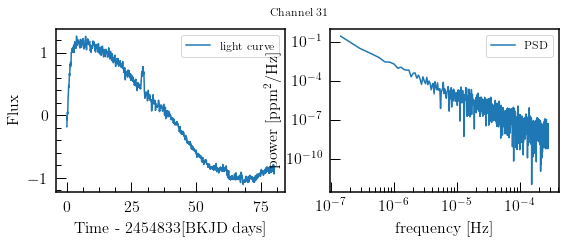

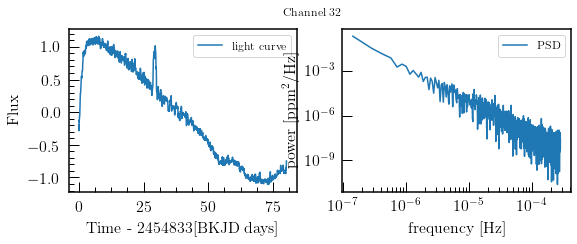

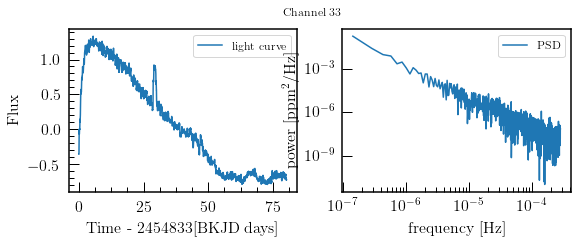

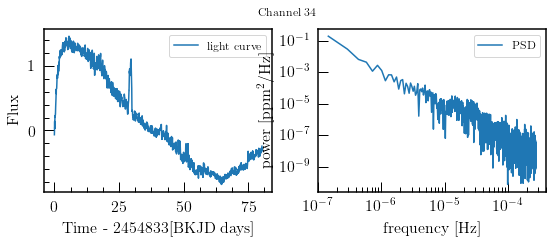

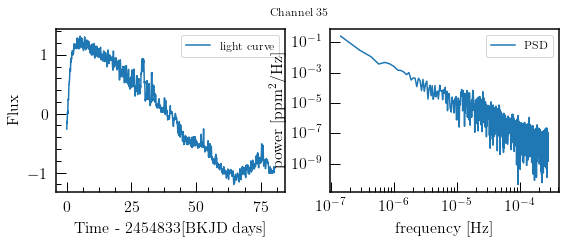

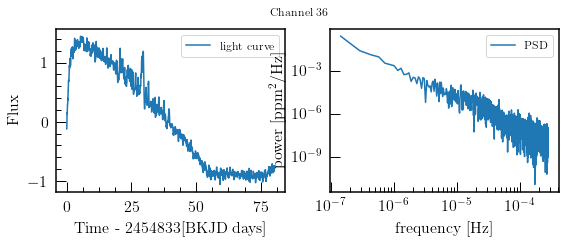

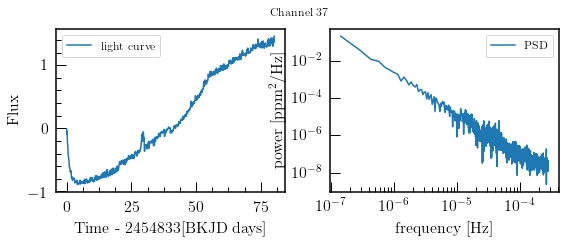

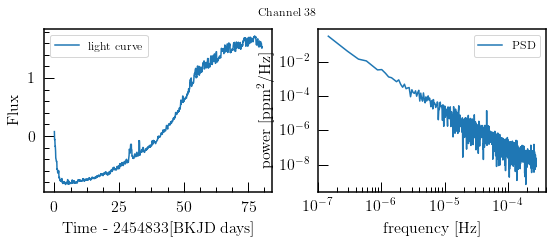

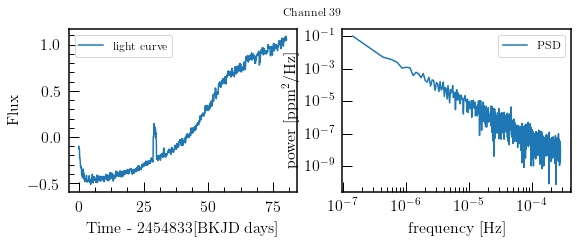

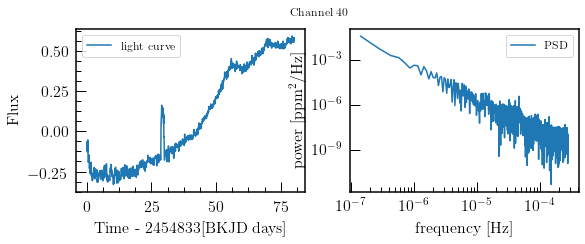

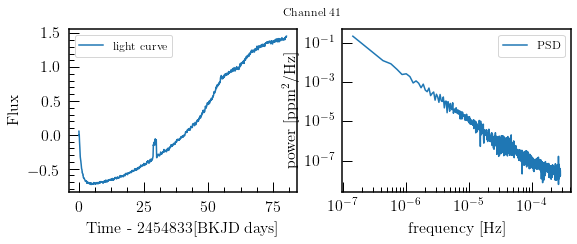

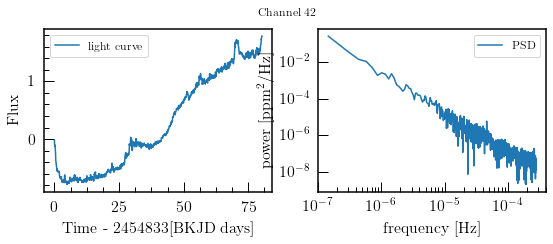

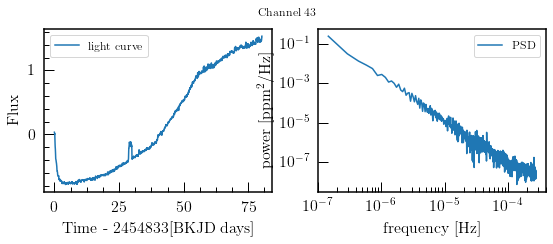

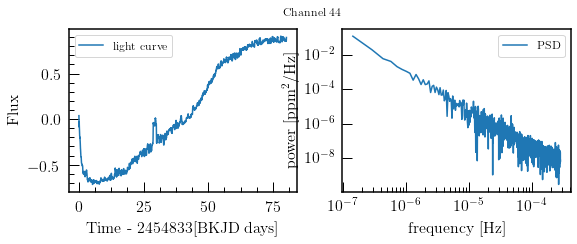

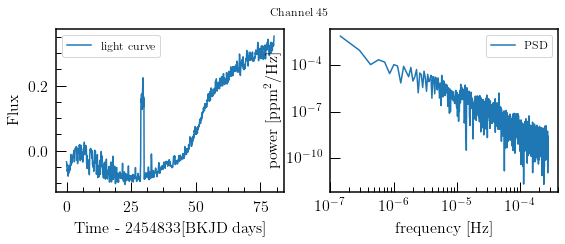

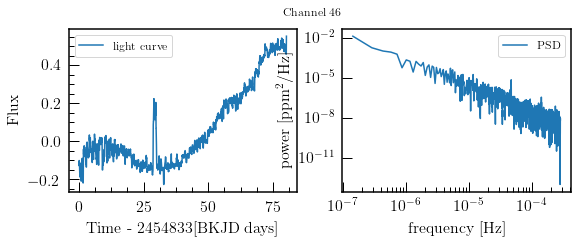

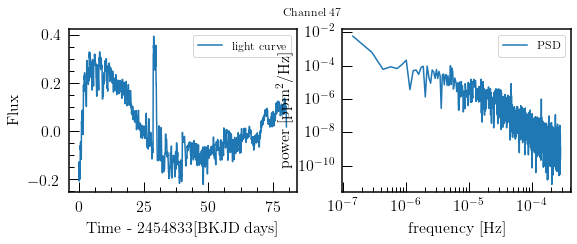

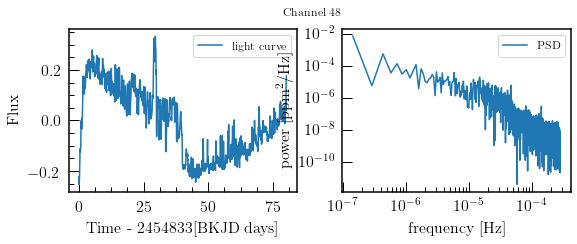

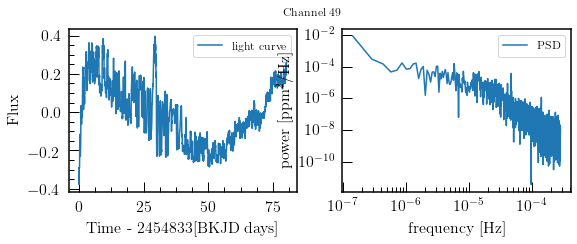

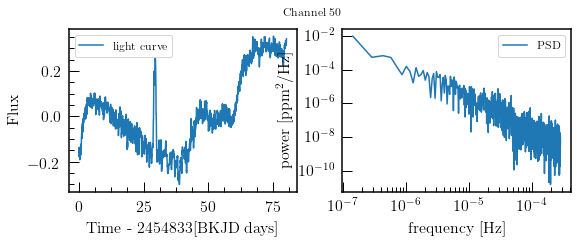

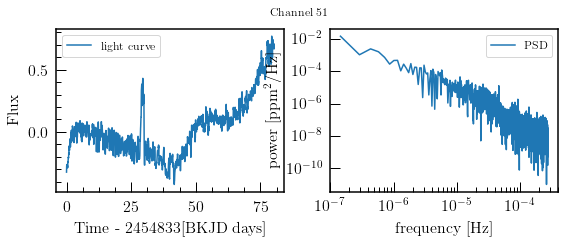

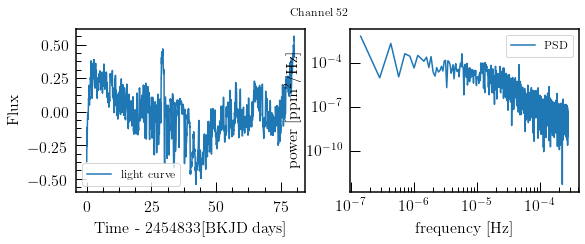

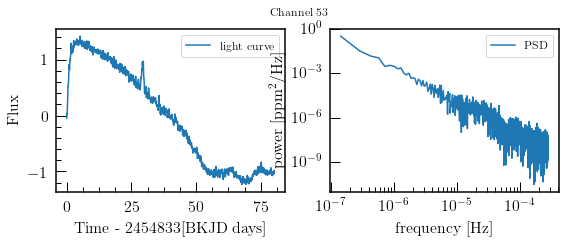

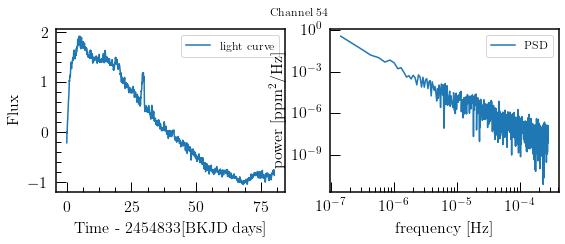

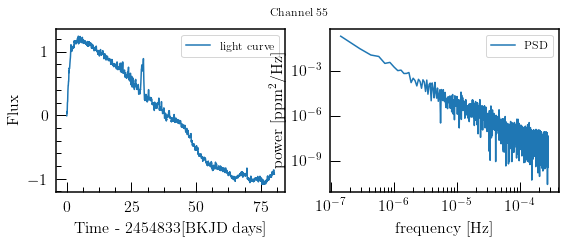

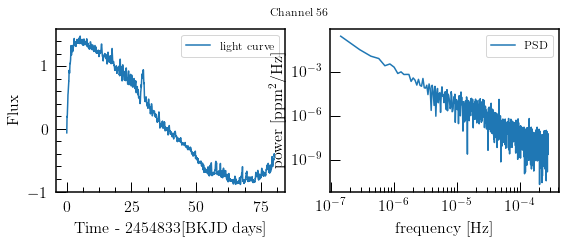

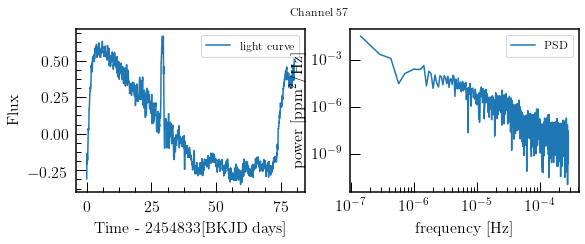

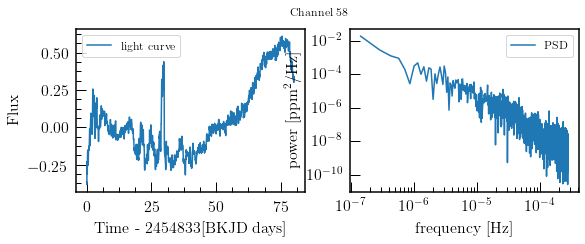

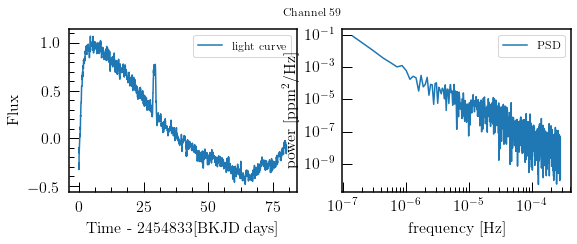

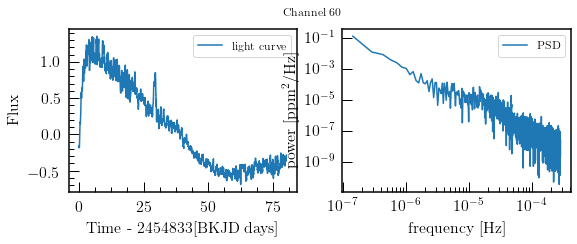

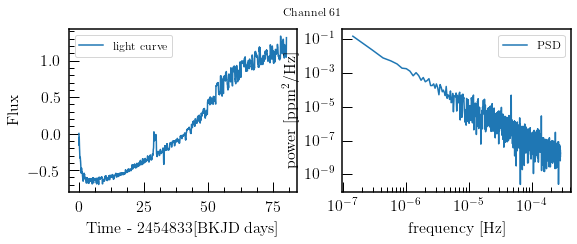

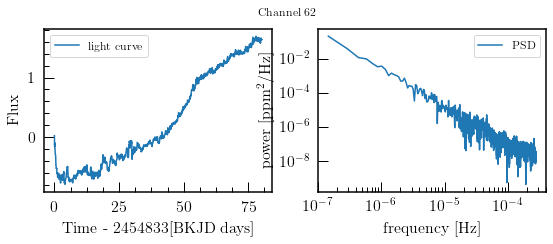

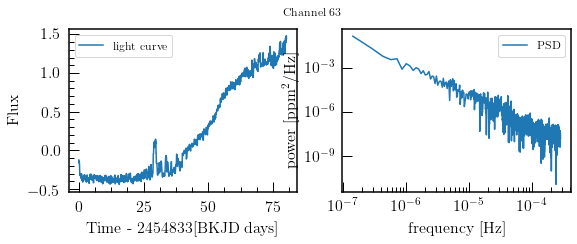

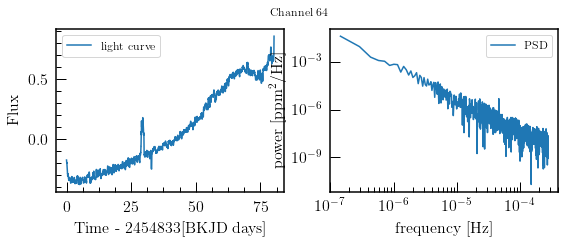

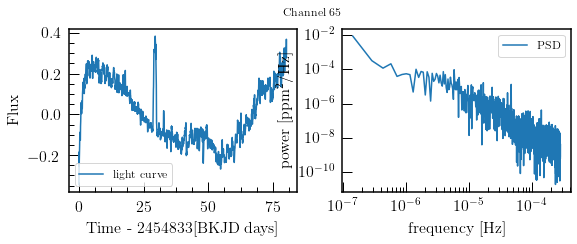

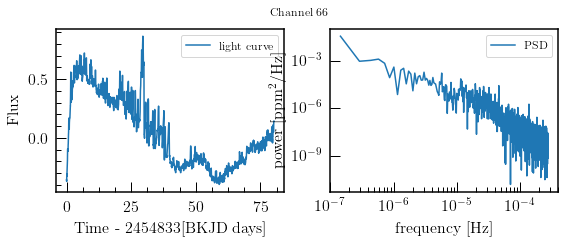

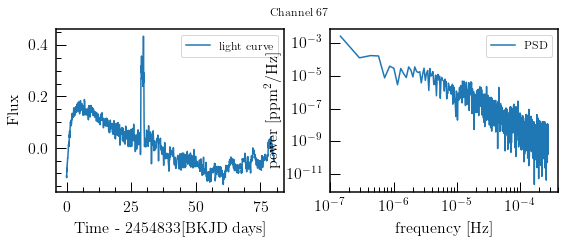

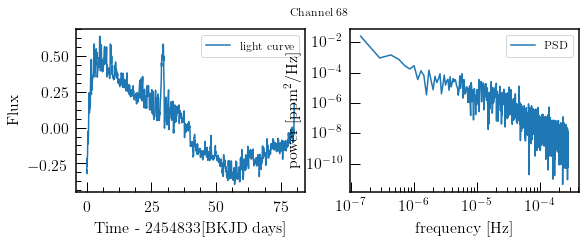

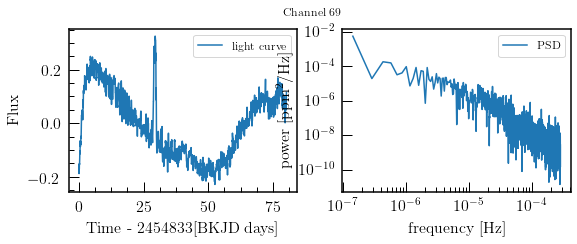

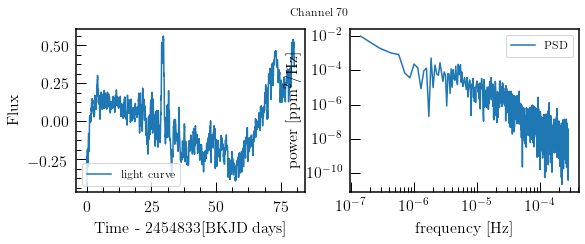

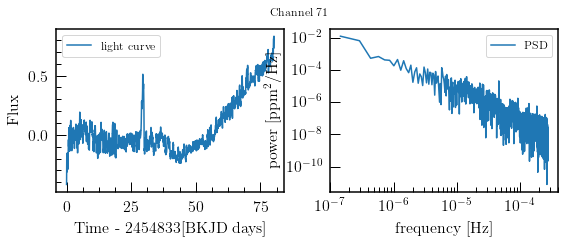

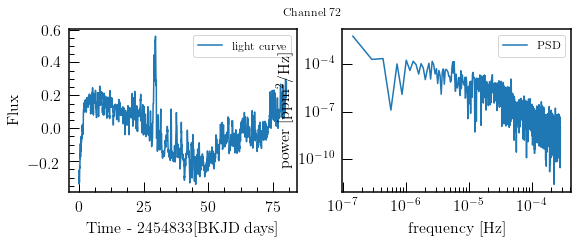

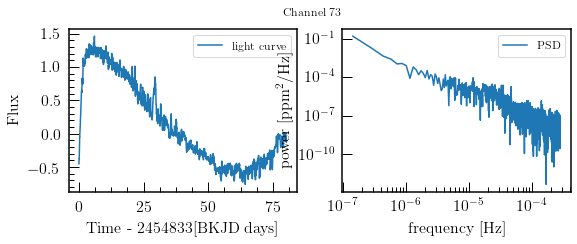

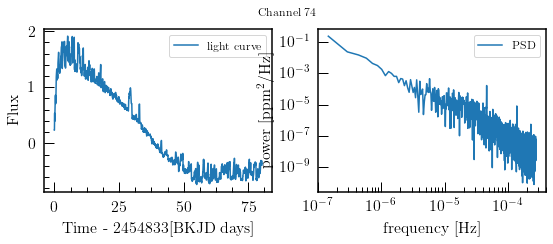

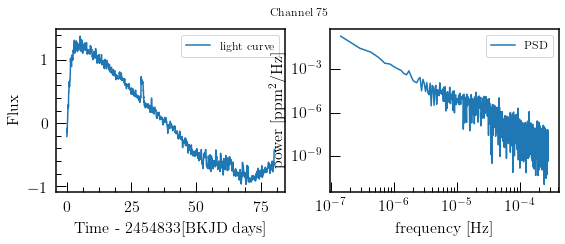

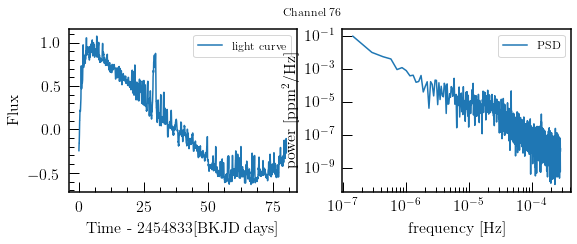

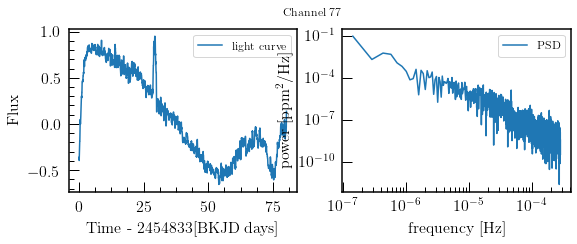

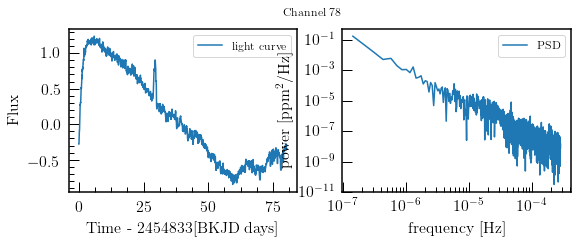

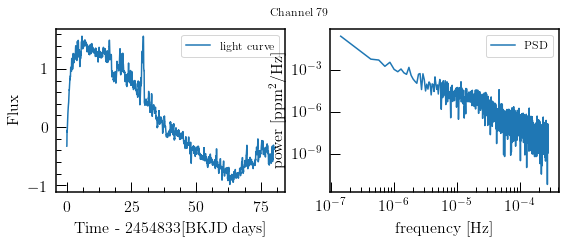

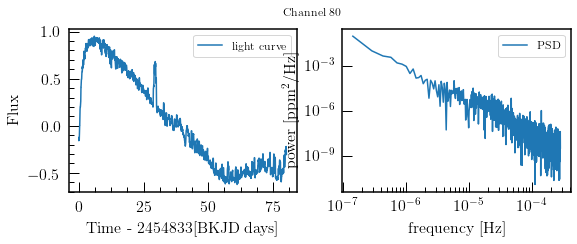

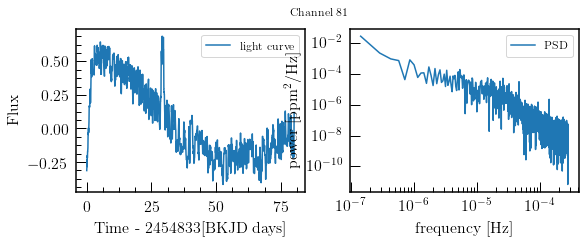

In [44]:
mag = 19.0

for ch in active_ch:
    #find all templates on that ccd channel
    channelMask = (all_channels_df.channel == ch)
    #pick the template lc that is closest in magnitude to our target on that specific channel
    magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()


    temp_flux = np.array(all_channels_df.iloc[magnitudeMask][:-4])
    temp_time = np.arange(len(temp_flux))/48.0 # converting to days, starting at zero
    fig, ax = plt.subplots(1,2, figsize=(9,3))
    plot_lc_PSD(temp_time, temp_flux, ax[0], ax[1], f=k2_freq)
    fig.suptitle("Channel %s"%ch)

There's probably a channel or two that got missed, but all of these look like they have slopes. Looking at the PSD y-axes, they don't look to be the same slope across all channels.

---
### Fitting slopes to the  PSDs

In [ ]:
mag = 19.0

for ch in active_ch[:5]:
    #find all templates on that ccd channel
    channelMask = (all_channels_df.channel == ch)
    #pick the template lc that is closest in magnitude to our target on that specific channel
    magnitudeMask = (np.abs(all_channels_df[channelMask].magnitude-mag)).idxmin()


    temp_flux = np.array(all_channels_df.iloc[magnitudeMask][:-4])
    temp_time = np.arange(len(temp_flux))/48.0 # converting to days, starting at zero
    
    # calculate the slope for 
    
    
    fig, ax = plt.subplots(1,3, figsize=(9,3))
    fig.suptitle("Channel %s"%ch)
    plot_lc_PSD(temp_time, temp_flux, ax[0], ax[1], l="(19th magnitude) " f=k2_freq)
    